In [9]:
%matplotlib inline
import random
import torch
from torch import nn
from torch.utils import data
import matplotlib.pyplot as plt

In [3]:
def synthetic_data(w, b, num_examples): #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [4]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.2853, -1.3411]) 
label: tensor([8.1951])


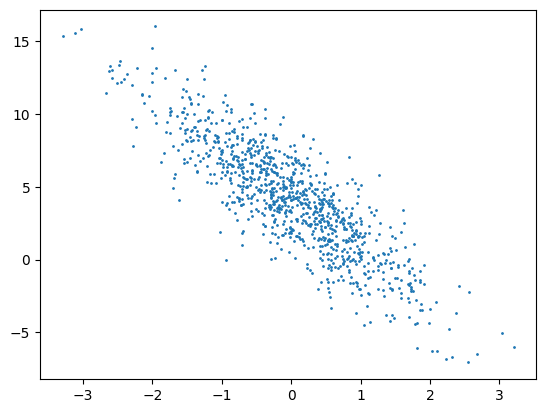

In [5]:
plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

In [6]:
def load_array(data_arrays, batch_size, is_train=True): #@save
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [7]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [8]:
next(iter(data_iter))

[tensor([[ 1.6376, -0.9204],
         [-0.1973, -2.4579],
         [-0.5254, -0.4765],
         [ 1.6589,  1.2158],
         [ 0.5611,  1.7366],
         [ 0.4954, -0.5816],
         [-1.1505,  0.0906],
         [-0.4732, -0.9828],
         [-0.3961, -0.2009],
         [ 0.7773, -0.2270]]),
 tensor([[10.6302],
         [12.1833],
         [ 4.7548],
         [ 3.3933],
         [-0.5718],
         [ 7.1645],
         [ 1.5837],
         [ 6.5799],
         [ 4.0970],
         [ 6.5293]])]

In [13]:
net = nn.Sequential(nn.Linear(2, 1))
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [23]:
num_epochs = 20
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000103
epoch 2, loss 0.000102
epoch 3, loss 0.000103
epoch 4, loss 0.000103
epoch 5, loss 0.000105
epoch 6, loss 0.000102
epoch 7, loss 0.000104
epoch 8, loss 0.000103
epoch 9, loss 0.000103
epoch 10, loss 0.000103
epoch 11, loss 0.000104
epoch 12, loss 0.000102
epoch 13, loss 0.000102
epoch 14, loss 0.000103
epoch 15, loss 0.000102
epoch 16, loss 0.000102
epoch 17, loss 0.000103
epoch 18, loss 0.000103
epoch 19, loss 0.000103
epoch 20, loss 0.000102


In [24]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([-0.0001,  0.0003])
b的估计误差： tensor([0.0004])
